In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import seaborn as sns


pd.set_option('display.max_columns', None)

In [2]:
full_table = pd.read_csv("data/dados TFM 2013.csv")
full_table

Categoria   Departamento            Produto Região   Loja   Evento  \
0       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    NYC  NYC_3   Easter   
1       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    PHI  PHI_2   Easter   
2       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    NYC  NYC_3  NewYear   
3       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    PHI  PHI_3  NewYear   
4       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_1  NoEvent   
...            ...            ...                ...    ...    ...      ...   
29994  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_227    BOS  BOS_1  NoEvent   
29995  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_160    PHI  PHI_3  NoEvent   
29996  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_477    PHI  PHI_1  NoEvent   
29997  SUPERMARKET  SUPERMARKET_2  SUPERMARKET_2_176    NYC  NYC_3  NoEvent   
29998  SUPERMARKET  SUPERMARKET_2  SUPERMARKET_2_190    NYC  NYC_3  NoEvent   

       Suma de Qtd. Vendida  Promedio de Preço médio de venda  
0                         7                          4.000000  
1                         2                          4.000000  
2                        16                          4.000000  
3                         2                          4.000000  
4                       252                          4.000000  
...                     ...                               ...  
29994                   729                        313.151515  
29995                    98                        313.188406  
29996                    38                        313.400000  
29997                   346                        313.529412  
29998                   324                        313.703226  

[29999 rows x 8 columns]

In [3]:
# Converter dados para uso no modelo
encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(full_table[['Categoria','Departamento','Produto','Evento','Loja','Região']]).toarray()

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Categoria','Departamento','Produto','Evento','Loja','Região']))

df_encoded = pd.concat([full_table, encoded_df], axis=1)

df_encoded

Categoria   Departamento            Produto Região   Loja   Evento  \
0       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    NYC  NYC_3   Easter   
1       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    PHI  PHI_2   Easter   
2       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    NYC  NYC_3  NewYear   
3       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    PHI  PHI_3  NewYear   
4       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_1  NoEvent   
...            ...            ...                ...    ...    ...      ...   
29994  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_227    BOS  BOS_1  NoEvent   
29995  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_160    PHI  PHI_3  NoEvent   
29996  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_477    PHI  PHI_1  NoEvent   
29997  SUPERMARKET  SUPERMARKET_2  SUPERMARKET_2_176    NYC  NYC_3  NoEvent   
29998  SUPERMARKET  SUPERMARKET_2  SUPERMARKET_2_190    NYC  NYC_3  NoEvent   

       Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                         7                          4.000000   
1                         2                          4.000000   
2                        16                          4.000000   
3                         2                          4.000000   
4                       252                          4.000000   
...                     ...                               ...   
29994                   729                        313.151515   
29995                    98                        313.188406   
29996                    38                        313.400000   
29997                   346                        313.529412   
29998                   324                        313.703226   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       1.0                    0.0                    0.0   
1                       1.0                    0.0                    0.0   
2                       1.0                    0.0                    0.0   
3                       1.0                    0.0                    0.0   
4                       1.0                    0.0                    0.0   
...                     ...                    ...                    ...   
29994                   0.0                    0.0                    1.0   
29995                   0.0                    0.0                    1.0   
29996                   0.0                    1.0                    0.0   
29997                   0.0                    0.0                    1.0   
29998                   0.0                    0.0                    1.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            1.0                        0.0   
1                            1.0                        0.0   
2                            1.0                        0.0   
3                            1.0                        0.0   
4                            1.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996       

In [4]:
# Converter colunas para deixar somente numeros inteiros
df_encoded['Suma de Qtd. Vendida'].astype('int64')
df_encoded['Promedio de Preço médio de venda'].astype('int64')

df_encoded

Categoria   Departamento            Produto Região   Loja   Evento  \
0       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    NYC  NYC_3   Easter   
1       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    PHI  PHI_2   Easter   
2       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    NYC  NYC_3  NewYear   
3       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    PHI  PHI_3  NewYear   
4       ACCESORIES   ACCESORIES_1   ACCESORIES_1_234    BOS  BOS_1  NoEvent   
...            ...            ...                ...    ...    ...      ...   
29994  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_227    BOS  BOS_1  NoEvent   
29995  SUPERMARKET  SUPERMARKET_3  SUPERMARKET_3_160    PHI  PHI_3  NoEvent   
29996  HOME&GARDEN  HOME&GARDEN_1  HOME&GARDEN_1_477    PHI  PHI_1  NoEvent   
29997  SUPERMARKET  SUPERMARKET_2  SUPERMARKET_2_176    NYC  NYC_3  NoEvent   
29998  SUPERMARKET  SUPERMARKET_2  SUPERMARKET_2_190    NYC  NYC_3  NoEvent   

       Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                         7                          4.000000   
1                         2                          4.000000   
2                        16                          4.000000   
3                         2                          4.000000   
4                       252                          4.000000   
...                     ...                               ...   
29994                   729                        313.151515   
29995                    98                        313.188406   
29996                    38                        313.400000   
29997                   346                        313.529412   
29998                   324                        313.703226   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       1.0                    0.0                    0.0   
1                       1.0                    0.0                    0.0   
2                       1.0                    0.0                    0.0   
3                       1.0                    0.0                    0.0   
4                       1.0                    0.0                    0.0   
...                     ...                    ...                    ...   
29994                   0.0                    0.0                    1.0   
29995                   0.0                    0.0                    1.0   
29996                   0.0                    1.0                    0.0   
29997                   0.0                    0.0                    1.0   
29998                   0.0                    0.0                    1.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            1.0                        0.0   
1                            1.0                        0.0   
2                            1.0                        0.0   
3                            1.0                        0.0   
4                            1.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996       

In [5]:
# Deixar somente colunas relevantes
df_encoded = df_encoded.drop(columns=['Categoria', 'Departamento','Produto','Evento','Loja','Região'])
df_encoded

Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                         7                          4.000000   
1                         2                          4.000000   
2                        16                          4.000000   
3                         2                          4.000000   
4                       252                          4.000000   
...                     ...                               ...   
29994                   729                        313.151515   
29995                    98                        313.188406   
29996                    38                        313.400000   
29997                   346                        313.529412   
29998                   324                        313.703226   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       1.0                    0.0                    0.0   
1                       1.0                    0.0                    0.0   
2                       1.0                    0.0                    0.0   
3                       1.0                    0.0                    0.0   
4                       1.0                    0.0                    0.0   
...                     ...                    ...                    ...   
29994                   0.0                    0.0                    1.0   
29995                   0.0                    0.0                    1.0   
29996                   0.0                    1.0                    0.0   
29997                   0.0                    0.0                    1.0   
29998                   0.0                    0.0                    1.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            1.0                        0.0   
1                            1.0                        0.0   
2                            1.0                        0.0   
3                            1.0                        0.0   
4                            1.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996                         1.0                         0.0   
29997                         0.0                         0.0   
29998                         0.0                         0.0   

       Departamento_SUPERMARKET_1  Departamento_SUPERMARKET_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996                         0.0                         0.0   
29997                         0.0                         1.0   
29998                         0.0               

In [6]:
# Criar StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)
X_scaled

array([[-0.24722328, -1.40591886,  2.62139032, ..., -0.6791373 ,
         1.24903103, -0.64491505],
       [-0.25168113, -1.40591886,  2.62139032, ..., -0.6791373 ,
        -0.80062062,  1.55059182],
       [-0.23919916, -1.40591886,  2.62139032, ..., -0.6791373 ,
         1.24903103, -0.64491505],
       ...,
       [-0.21958465,  1.81266596, -0.38147696, ..., -0.6791373 ,
        -0.80062062,  1.55059182],
       [ 0.05501859,  1.81401219, -0.38147696, ..., -0.6791373 ,
         1.24903103, -0.64491505],
       [ 0.03540408,  1.81582032, -0.38147696, ..., -0.6791373 ,
         1.24903103, -0.64491505]])

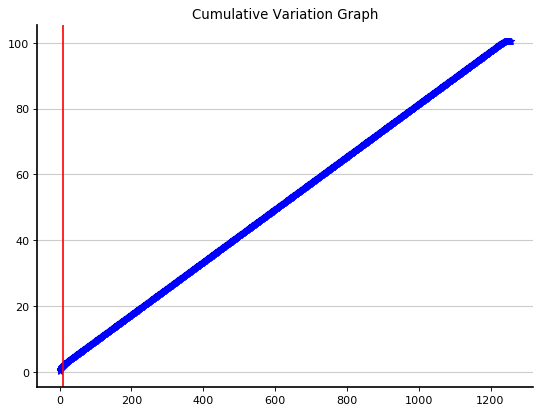

In [7]:
# Principal Components Analysis (PCA)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)
data_scaled_pca = pca.transform(X_scaled)
data_scaled_pca

# Determinar la varianza del dataset
var = pca.explained_variance_ratio_

# Determinar la varianza acumulada del dataset
cum_var = np.cumsum(np.round(var, decimals=4)*100)

# Gráfica de la varianza acumulada
fig, ax = plt.subplots(figsize=(8,6), dpi = 80)
plt.title("Cumulative Variation Graph")
plt.plot(cum_var, "b-*")
plt.axvline(x=8, color = "r")
for i in ['bottom', 'left']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(1.5) 
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)
ax.set_axisbelow(True)
ax.grid(color='gray', linewidth=1, axis='y', alpha=0.4)
plt.show()

In [13]:
from sklearn.cluster import AgglomerativeClustering

data = df_encoded

# numero de clusters
n_clusters = 3 

# modelo AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=n_clusters)

# Fit do modelo
clusters = model.fit_predict(data)

# add coluna cluster ao dataframe
data['cluster'] = clusters
data

Suma de Qtd. Vendida  Promedio de Preço médio de venda  \
0                         7                          4.000000   
1                         2                          4.000000   
2                        16                          4.000000   
3                         2                          4.000000   
4                       252                          4.000000   
...                     ...                               ...   
29994                   729                        313.151515   
29995                    98                        313.188406   
29996                    38                        313.400000   
29997                   346                        313.529412   
29998                   324                        313.703226   

       Categoria_ACCESORIES  Categoria_HOME&GARDEN  Categoria_SUPERMARKET  \
0                       1.0                    0.0                    0.0   
1                       1.0                    0.0                    0.0   
2                       1.0                    0.0                    0.0   
3                       1.0                    0.0                    0.0   
4                       1.0                    0.0                    0.0   
...                     ...                    ...                    ...   
29994                   0.0                    0.0                    1.0   
29995                   0.0                    0.0                    1.0   
29996                   0.0                    1.0                    0.0   
29997                   0.0                    0.0                    1.0   
29998                   0.0                    0.0                    1.0   

       Departamento_ACCESORIES_1  Departamento_ACCESORIES_2  \
0                            1.0                        0.0   
1                            1.0                        0.0   
2                            1.0                        0.0   
3                            1.0                        0.0   
4                            1.0                        0.0   
...                          ...                        ...   
29994                        0.0                        0.0   
29995                        0.0                        0.0   
29996                        0.0                        0.0   
29997                        0.0                        0.0   
29998                        0.0                        0.0   

       Departamento_HOME&GARDEN_1  Departamento_HOME&GARDEN_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996                         1.0                         0.0   
29997                         0.0                         0.0   
29998                         0.0                         0.0   

       Departamento_SUPERMARKET_1  Departamento_SUPERMARKET_2  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
29994                         0.0                         0.0   
29995                         0.0                         0.0   
29996                         0.0                         0.0   
29997                         0.0                         1.0   
29998                         0.0               

In [14]:
data['cluster'].value_counts()

0    29497
1      478
2       24
Name: cluster, dtype: int64

In [15]:
import joblib

# Salvar o modelo em disco
joblib.dump(model, 'model_clustering/model_agglomerativeclustering_2013.pkl')

['model_clustering/model_agglomerativeclustering_2013.pkl']

In [16]:
data.to_csv('model_clustering/base_2013.csv')

In [17]:
# Obtendo os nomes das colunas originais
original_column_names = ['Categoria','Departamento','Produto','Evento','Loja','Região']

# Criando um DataFrame com as colunas originais
df_original = pd.DataFrame(encoder.inverse_transform(encoded_data), columns=original_column_names)
df_original

# # Certifique-se de que o número de linhas em df_original é o mesmo que em full_table
df_original.index = full_table.index

# # Concatenando o DataFrame original com as colunas originais
df_with_original_columns = pd.concat([data, df_original], axis=1)


# # Removendo as colunas codificadas
df_with_original_columns = df_with_original_columns.drop(columns=encoder.get_feature_names_out(original_column_names))

# # Visualizando o DataFrame com as colunas originais
df_with_original_columns.head()

Suma de Qtd. Vendida  Promedio de Preço médio de venda  cluster  \
0                     7                               4.0        0   
1                     2                               4.0        0   
2                    16                               4.0        0   
3                     2                               4.0        0   
4                   252                               4.0        0   

    Categoria  Departamento           Produto   Evento   Loja Região  
0  ACCESORIES  ACCESORIES_1  ACCESORIES_1_234   Easter  NYC_3    NYC  
1  ACCESORIES  ACCESORIES_1  ACCESORIES_1_234   Easter  PHI_2    PHI  
2  ACCESORIES  ACCESORIES_1  ACCESORIES_1_234  NewYear  NYC_3    NYC  
3  ACCESORIES  ACCESORIES_1  ACCESORIES_1_234  NewYear  PHI_3    PHI  
4  ACCESORIES  ACCESORIES_1  ACCESORIES_1_234  NoEvent  BOS_1    BOS

In [19]:
df_with_original_columns['Ano'] = 2013
df_with_original_columns.to_csv('model_clustering/base_original_2013.csv')